In [ ]:
#Problema digului
#1.
import sympy as sp
rho, g, x1, x2, x3, nu, E = sp.symbols("rho,g, x1, x2, x3, nu, E", real = True)

def afisare_mesaj(mesaj):
    chenar = '-'
    linie = len(mesaj) * chenar
    print(linie)
    print(mesaj)
    print(linie)


h = 2 #Inaltimea
# Definim starea de tensiune in dig

T = rho*g*sp.Matrix([[x2, x1, 0],
                     [x1, -(2*x1 + x2), 0],
                     [0, 0, -2*nu*x1]])


afisare_mesaj('Starea de tensiune in dig')
print('\t\t T = ')
sp.pprint(T)

# Se verifică dacă starea de tensiune satisface ecuația de echilibru div T = 0

# (se neglijeaza efectul forțelor de volum asupra deformării digului)
# Pe componente ecuatia div T = 0 se scrie (div T)_i = 0, i =1,2,3

Ec1 = sp.diff(T[0,0], x1) + sp.diff(T[0,1], x2) + sp.diff(T[0,2], x3) #Expresie simbolica reprezentand prima ecuatie
Ec2 = sp.diff(T[1,0], x1) + sp.diff(T[1,1], x2) + sp.diff(T[1,2], x3) #Expresie simbolica reprezentand a doua ecuatie
Ec3 = sp.diff(T[2,0], x1) + sp.diff(T[2,1], x2) + sp.diff(T[2,2], x3) #Expresie simbolica reprezentand a treia ecuatie

afisare_mesaj('Verificare ecuația de echilibrul pe componente')
print('\t\t (div T)_1 = 0')
sp.pprint(Ec1==0)

print('\t\t (div T)_2 = 0')
sp.pprint(Ec2==0)

print('\t\t (div T)_3 = 0')
sp.pprint(Ec3==0)

# Se verifică condiția pe frontieră. Frontiera digului este compusă din 3 secțiuni, S0, S1, S2
# Intrucat presiunea apei este direct proporțională cu adâncimea apei, forța
# care acționează pe secțiunea S2 este egală cu F = -rho * g * x2  * i1
# Starea de tensiune verifică condiția pe frontieră Tn|S1 = F1

# Definim normala exterioară la S1
n1 = sp.Matrix([[-1],
                [0],
                [0]]) # definim un vector simbolic

# Determinam tensiunea pe S1 impunând in T restricția x1 = 0
T1 = T.subs(x1, 0)

# Definim forta care actioneaza pe S1
F1 = sp.Matrix([[-rho*g*x2],
                [0],
                [0]])

afisare_mesaj('Verificare condiția pe frontiera S1')
print('\t\t Tn|S1 = F')
sp.pprint(T1*n1 == F1)

# In mod analog verificam condiția pe frontieră pe secțiunea S2 impunând restricția x2 = -x1

n2 = sp.Matrix([[sp.sqrt(2)/2],
                [sp.sqrt(2)/2],
                [0]])

T2 = T.subs(x2, -x1)

F2 = sp.Matrix([[0],
                [0],
                [0]])

afisare_mesaj('Verificare condiția pe frontiera S2')
print('\t\t Tn|S2 = F')
sp.pprint(T2*n2 == F2)

#2.
# Calulăm matricea asociată tensorului de deformații infinitezimale în baza inversei ecuației constitutive

epsilon = ((1+nu)/E)*T - (nu/E)*(T[0,0] + T[1,1] + T[2,2])*sp.eye(3,3)
epsilon = sp.simplify(epsilon) #Simplificam expresia

afisare_mesaj('Matricea asociata tensorului de deformatii infinitezimale epsilon,\n forma simplificată')
print('\t\t epsilon = ')
sp.pprint(epsilon)

#3.
fun = sp.Function("fun")
gfun = sp.Function("gfun")
 # f = sm.Function('f') defineste o funcție abstractă fără a se cunoaște în prealabil, atât variabilele cat si
# expresia acesteia. Această funcție poate fi apelată cu orice variabile simbolice.
# fun(x1), fun(x1,x2) etc.
# Dacă funcția este definită împreună cu variabilele,
# g = sm.Function("g")(x1, x2)
# atunci numărul de variabile rămâne fix. Apelul funcției se face doar cu numele funcției
# print(g)
# Se afișează:
# g(x1, x2)

u1 = sp.integrate(epsilon[0,0],x1) + fun(x2) #func(x2) reprezintă constanta de integrare dependentă de x2
u2 =  sp.integrate(epsilon[1,1],x2) + gfun(x1) #gfunc(x1) reprezintă constanta de integrare dependentă de x1

u1 = sp.simplify(u1)
u2 = sp.simplify(u2)

afisare_mesaj('Componentele deplasarii u1, u2 dependente de constantele de integrare')

print('\t\t u1 = ')
sp.pprint(u1)

print('\t\t u2 = ')
sp.pprint(u2)

# componentele vectorului de deplasare verifică ecuația eps12 = 1/2(du1/dx2 + du2/dx1), unde dui/dxj reprezintă
# derivata parțială a componentei ui în raport cu xj
Expresie = sp.diff(u1, x2) + sp.diff(u2, x1) - 2*epsilon[0,1]  #du1/dx2 + du2/dx1 - 2 eps12
Expresie = sp.simplify(Expresie) # O aducem la forma simplificara

afisare_mesaj('Relația din care determinăm funcțiile f(x2) și g(x1)')
print('\t\t u1,2 + u2,1 - 2 * epsilon_12 = 0 ')
sp.pprint(Expresie)

Expresie = sp.expand(Expresie)
sp.pprint(Expresie)

termx2, termx1 = Expresie.as_independent(x1,as_Add=True) ##Expresie = termx2 + termx1 sau F(x2) = G(x1)
# as_independent(var) separă expresia matematică în două expresii, una independentă de var, și alta
# dependentă de var.
# Astfel, termx2 reprezintă o expresie dependentă de x2 (independentă de x1) și termx1 o expresie dependentă de x1.
# Parametrul as_Add = True se referă la faptul că separarea se face aditiv. Parametrul as_Mul = True separă multiplicativ.

termx2 = sp.simplify(termx2) #Simplificam
termx1 = sp.simplify(termx1) #Simplificam

afisare_mesaj('Identificarea a două expresii, una dependentă de '
              ' x1, iar cealalta dependentă doar de x2')
print('\t\t G(x1)= ')
sp.pprint(-termx1)

print('\t\t F(x2)= ')
sp.pprint(termx2)



#Cum termx2 = -termx1 = K, in urma rezolvarii celor doua ecuatii determinam f'(x2) si g'(x1)
K, c1, c2 = sp.symbols('K,c1,c2')
# fun(x2).diff(x2)
dfx2 = sp.solve(termx2 - K, sp.diff(fun(x2), x2)) #Rezolvam ecuatia termx2 = K si determinam f'(x2)
dgx1 = sp.solve(-termx1 - K, sp.diff(gfun(x1), x1))  #Rezolvam ecuatia -termx1 = K si determinam g'(x1)

sp.pprint(dfx2)
sp.pprint(dgx1)

fx2 = sp.integrate(dfx2[0], x2) + c2 # Calculul funcțiilor f(x2), respectiv g(x1)
gx1 = sp.integrate(dgx1[0], x1) + c1

sp.pprint(fx2)

# Restabilirea funcțiilor u1, respectiv u2, înlocuind expresiile funcțiilor f(x2), respectiv g(x1)
u1 = u1.subs(fun(x2), fx2) #subs
u2 = u2.subs(gfun(x1), gx1) #subs

afisare_mesaj('Componentele deplasării în forma finală dependente de constantele de integrare')
print('\t\t u1 = ')
sp.pprint(u1)

print('\t\t u2 = ')
sp.pprint(u2)

# 4.
# Continuăm să determinăm constantele, impunând condiții pe frontieră
#u1(0,-h) = u2(0,-h) = u2(h,-h) = 0
sol = sp.solve([u1.subs([(x1, 0), (x2, -h)]), u2.subs([(x1, 0), (x2, -h)]), u2.subs([(x1, h), (x2, -h)])], [K, c1, c2])
sp.pprint(sol)

Ksol= sol[K]
c1sol = sol[c1]
c2sol = sol[c2]

# sp.pprint(Ksol)

# Înlocuirea constantelor cu expresiile acestora
u1 = u1.subs([(K, Ksol), (c2, c2sol)])
u2 = u2.subs([(K, Ksol), (c1, c1sol)])

afisare_mesaj('Componentele deplasării, forma finală')
print('\t\t u1 = ')
sp.pprint(u1)

print('\t\t u2= ')
sp.pprint(u2)

u1 = u1.subs([(E, 2.1 * 10**11),(nu,0.3),(rho,1000),(g,9.8)])
u2 = u2.subs([(E, 2.1 * 10**11),(nu,0.3),(rho,1000),(g,9.8)])

import numpy as np
u1 = sp.lambdify([x1,x2], u1, "numpy")
u2 = sp.lambdify([x1,x2], u2, "numpy")

##

#5., 6.
# Pentru a discretiza domeniul triunghiular se va discretiza mai întâi domeniul [0,h]x[-h,0], și apoi se vor păstra
# punctele situate în semiplanul inferior x1+x2<=0.


x = np.linspace(0,h,50)
y = np.linspace(-h,0,50)
x,y = np.meshgrid(x,y)
contor = 0
X1 = []
X2 = []
X1new = []
X2new = []
U1 = []
U2 = []
fact_scala = 10 ** 6
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if x[i,j] + y[i,j]<=0:
	    #Adaugam elementul xij la lista X1
            X1.append(x[i,j])
        #Adaugam elementul Yij la lista X2
            X2.append(y[i,j])
        # Calculul deplasărilor în punctele din domeniul triunghiular si le adaugam la U1, resectiv U2
            U1.append(u1(x[i,j], y[i,j]))
            U2.append(u2(x[i,j], y[i,j]))
        # Calculul coordonatelor punctelor deplasate (xij + fact_scala * u1) si le adaugam la lista X1new
            X1new.append(x[i,j] + fact_scala * U1[contor])
        # Calculul coordonatelor punctelor deplasate (yij + fact_scala * u2) si le adaugam la lista X2new
            X2new.append(y[i,j] + fact_scala * U2[contor])
            contor = contor + 1

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Graficul domeniului nedeformat
ax.plot(X1, X2, linestyle='None',marker = '.',markersize = 10, markerfacecolor = 'k', markeredgecolor = "k")

# Graficul domeniului deformat
ax.plot(X1new, X2new, linestyle='None',marker = '.',markersize = 10, markerfacecolor = 'b', markeredgecolor = "b")
ax.axis('equal')
ax.grid(True, color='b')
ax.set_title('Domeniul nedeformat, respectiv deformat')


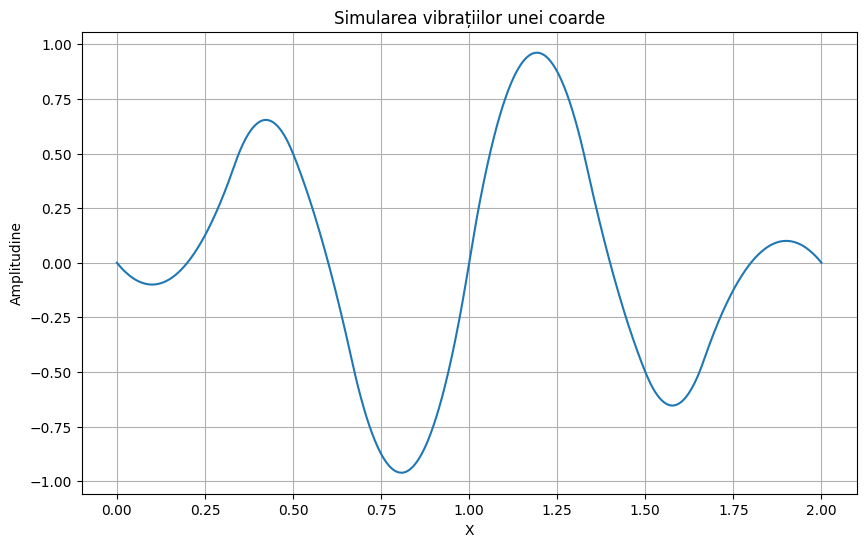

In [ ]:
### tema 2
# Ex 49
'''
Avem o coarda vibranta cu lungimea l = 2 si raportul a^2 = µ/ρ = 1. Scopul este sa simulam vibratiile acestei coarde,
unde functiile de forma f(X) = X(X − l) si g(X) = 0 descriu conditiile initiale.
Se considera ca solutia poate fi aproximata cu un numar de n = 20 termeni, iar analiza se
efectueaza in intervalul temporal t ∈ [0, 10].
'''
import numpy as np
import matplotlib.pyplot as plt

# Parametrii coardei
l = 2  # lungimea coardei
n = 20  # numărul de termeni în aproximarea Fourier
t = np.linspace(0, 10, 1000)  # intervalul temporal

# Funcțiile initiale
f = lambda X: X * (X - l)

g = lambda X: 0

# Aproximarea Fourier
def fourier_s(X, f, g, t, n):
  serii_suma = np.zeros_like(X)
  for i in range(1, n+1):
        eigenfunction = np.sin(i * np.pi * X/l)
        coef_f = 2 / l * np.trapz(f(X) * eigenfunction, X)
        coef_g = 2 / l * np.trapz(g(X) * eigenfunction, X)
        serii_suma += (coef_f * np.cos(i * np.pi * t/l) + coef_g * np.sin(i * np.pi * t/l)) * eigenfunction
  return serii_suma

# Calculul evoluției în timp a funcțiilor
X = np.linspace(0, l, 1000)  # intervalul spațial
sol = fourier_s(X, f, g, t, n)

# Vizualizare
plt.figure(figsize=(10, 6))
plt.plot(X, sol)
plt.title('Simularea vibrațiilor unei coarde')
plt.xlabel('X')
plt.ylabel('Amplitudine')
plt.grid(True)
plt.show()


------------------------------
Gradientul deformatiei F(X, t)
------------------------------
		 F = 
⎡1     0       0   ⎤
⎢                  ⎥
⎢0  cos(θ)   sin(θ)⎥
⎢                  ⎥
⎣0  -sin(θ)  cos(θ)⎦
--------------------------------------------
Inversul gradientului deformației F^-1(X, t)
--------------------------------------------
		 F^-1 = 
⎡1          0              0   ⎤
⎢                              ⎥
⎢        2                     ⎥
⎢     sin (θ)     1            ⎥
⎢0  - ─────── + ──────  -sin(θ)⎥
⎢      cos(θ)   cos(θ)         ⎥
⎢                              ⎥
⎣0        sin(θ)        cos(θ) ⎦
------------------------------
Viteza în descrierea materială
------------------------------
		 V = 
⎡                0                ⎤
⎢                                 ⎥
⎢            ⎛ 2⎞             ⎛ 2⎞⎥
⎢- 2⋅X₂⋅t⋅sin⎝t ⎠ + 2⋅X₃⋅t⋅cos⎝t ⎠⎥
⎢                                 ⎥
⎢            ⎛ 2⎞             ⎛ 2⎞⎥
⎣- 2⋅X₂⋅t⋅cos⎝t ⎠ - 2⋅X₃⋅t⋅sin⎝t ⎠⎦
-----------------------------
V

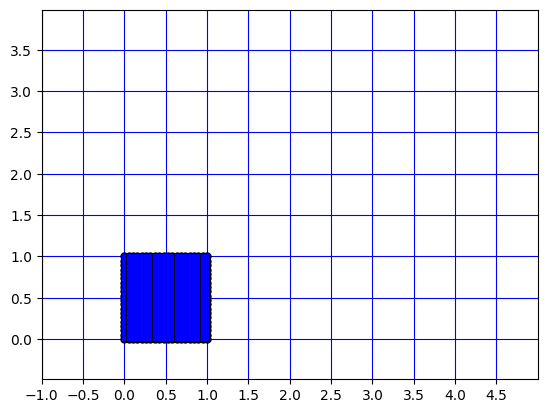

In [ ]:
### tema 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sp

#%% ex 26
#a) Sa se calculeze simbolic gradientul deformatiei F(X, t) si inversul acestuia F^−1(x, t)
#b) Viteza si acceleratia ın descriere materiala, respectiv spatiala
#c) Tensorii L, D, W in cazul miscarii date
#d) Sa se anime miscarea domeniului (X2, X3)∈[0, 1]×[0, 1] pe intervalul de timp t∈[0, 10]

def afisare_mesaj(mesaj):
    chenar = '-'
    linie = len(mesaj) * chenar
    print(linie)
    print(mesaj)
    print(linie)

#a)Sa se calculeze simbolic gradientul deformatiei F(X, t) si inversul acestuia F^−1(x, t)
t = sp.Symbol("t", positive=True)
theta = t**2

X1, X2, X3 = sp.symbols("X1, X2, X3", real = True)
theta_s = sp.Symbol("theta", real=True)
# Calculul expresiilor simbolice care determină mișcarea
x1 = X1
x2 = sp.cos(theta_s)*X2 + sp.sin(theta_s)*X3
x3 = -sp.sin(theta_s)*X2 + sp.cos(theta_s)*X3

# Scrierea acestora sub forma de obiecte de tip Matrix
X = sp.Matrix([X1, X2, X3])
x = sp.Matrix([x1, x2, x3])
#sp.pprint(x)
# Inițializarea gradientului de deformație
F = sp.zeros(3, 3)

for i in range(3):
    for j in range(3):
        F[i, j] = sp.diff(x[i], X[j])

F_inv = F.inv()

afisare_mesaj('Gradientul deformatiei F(X, t)')
print('\t\t F = ')
sp.pprint(F)

afisare_mesaj('Inversul gradientului deformației F^-1(X, t)')
print('\t\t F^-1 = ')
sp.pprint(F_inv)

#b)Viteza si acceleratia in descriere materiala, respectiv spatiala
V = sp.Matrix([sp.diff(x[i].subs(theta_s, theta), t) for i in range(3)])  # Viteza în descrierea materială
A = sp.Matrix([sp.diff(V[i], t) for i in range(3)])  # Accelerația în descrierea materială

#F_inv_matrix = sp.Matrix(F_inv)
v = F_inv * V  # Viteza în descrierea spațială
a = F_inv * A  # Accelerația în descrierea spațială

afisare_mesaj('Viteza în descrierea materială')
print('\t\t V = ')
sp.pprint(V)
afisare_mesaj('Viteza în descrierea spațială')
print('\t\t v = ')
sp.pprint(v)

afisare_mesaj('Accelerația în descrierea materială')
print('\t\t A = ')
sp.pprint(A)
afisare_mesaj('Accelerația în descrierea spațială')
print('\t\t a = ')
sp.pprint(a)

#c)Tensorii L, D, W ın cazul miscarii date
# Calculul gradientului vitezei
grad_v = sp.Matrix([[sp.diff(v[i], X[j]) for j in range(3)] for i in range(3)])

# Definirea tensorilor
D = (grad_v + grad_v.T) / 2  # partea simetrică a gradientului vitezei
W = (grad_v - grad_v.T) / 2  # partea antisimetrică a gradientului vitezei
L = D + W  # tensorul de deformare totală

afisare_mesaj('Tensorul deformatiei totale L')
print('\t\t L = ')
sp.pprint(L)

afisare_mesaj('Tensorul de deformare simetric D')
print('\t\t D = ')
sp.pprint(D)

afisare_mesaj('Tensorul de deformare antisimetric W')
print('\t\t W = ')
sp.pprint(W)


#d)Sa se anime miscarea domeniului (X2, X3)∈[0, 1]×[0, 1] pe intervalul de timp t∈[0, 10]
X2_d = np.linspace(0, 1, 20)
X3_d = np.linspace(0, 1, 20)
X2_d, X3_d = np.meshgrid(X2_d, X3_d)

t = np.linspace(0, 10, 20)

theta = lambda t: t**2
X1, X2, X3 = sp.symbols("X1, X2, X3", real=True)
theta_s = sp.symbols("theta", real=True)

# Definirea zonei grafice și a sistemului de coordonate în baza metodei subplots
fig, ax = plt.subplots()

for i in range(len(t)):
    theta_val = t[i]**2

    x2 = sp.cos(theta_val) * X2 + sp.sin(theta_val) * X3
    x3 = -sp.sin(theta_val) * X2 + sp.cos(theta_val) * X3

    x2_num = sp.lambdify((X2, X3), x2, 'numpy')
    x3_num = sp.lambdify((X2, X3), x3, 'numpy')

    x2_vals = x2_num(X2_d, X3_d)
    x3_vals = x3_num(X2_d, X3_d)

    ax.clear()
    ax.axis('equal')
    ax.grid(True, color='b')
    ax.plot(x2_vals, x3_vals, linestyle='None', marker='.', markersize=10, markerfacecolor='k', markeredgecolor='k')
    ax.plot(x2_vals, x3_vals, linestyle='-', color='b', lw=3)
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 3)
    ax.set_xticks(np.arange(-1, 5, 0.5))
    ax.set_yticks(np.arange(-1, 5, 0.5))
    plt.pause(0.005)

plt.show()

In [ ]:
'''
X2 = np.linspace(0, 1, 20)
X3 = np.linspace(0, 1, 20)
t = np.linspace(0, 10, 20)
X2, X3 = np.meshgrid(X2, X3)

fig = plt.figure(1)
ax = plt.axes()

# Definirea funcției pentru animație
def animate_frame(i):
    ax.clear()
    theta_val = t[i]**2
    x2_val = np.cos(theta_val) * X2 + np.sin(theta_val) * X3
    x3_val = -np.sin(theta_val) * X2 + np.cos(theta_val) * X3
    ax.plot(x2_val, x3_val, linestyle='None', marker='.', markersize=13, markerfacecolor='r', markeredgecolor='r')
    ax.axis('equal')
    ax.set_title(f'Timp: {t[i]:.2f}')
    return ax

# Crearea animației
anim = animation.FuncAnimation(fig, animate_frame, frames=len(t), interval=200, blit=False)
plt.show()
'''


0.18476799407087163
0.025232005929128387


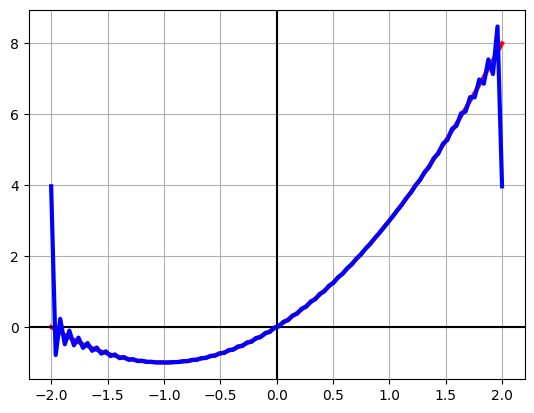

In [ ]:
#lab 4

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2 + 2*x
xmin = -2
xmax = 2
l = 2
fig = plt.figure()
ax = plt.axes()
x_grafic = np.linspace(xmin, xmax, 100)
y_grafic = f(x_grafic)
ax.plot(x_grafic, y_grafic, linestyle = '-', lw = 3, label = 'y = f(x)', color = 'r')
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
ax.grid(True)

def Fourier(f, l, x, n):
  a = np.zeros(n+1)
  b = np.zeros(n+1)
  xtrapz = np.linspace(-l, l, 10000)
  a[0] = 1/l * np.trapz(f(xtrapz),xtrapz)
  S = a[0]/2
  for k in range(1, n+1):
    a[k] = 1/l * np.trapz(f(xtrapz)*np.cos(k*np.pi*xtrapz/l), xtrapz)
    b[k] = 1/l * np.trapz(f(xtrapz)*np.sin(k*np.pi*xtrapz/l), xtrapz)
    S = S + a[k] * np.cos(k*np.pi*x/l) + b[k] * np.sin(k*np.pi*x/l)
  return S

x = 0.1
n = 50
S = Fourier(f, l, x, n)
print(S)
err = np.abs(f(x) - S)
print(err)

S_grafic = Fourier(f, l, x_grafic, n)
ax.plot(x_grafic, S_grafic, linestyle = '-', lw = 3, color = 'b', label = 'y = S(x)')

(-3.0, 3.0)

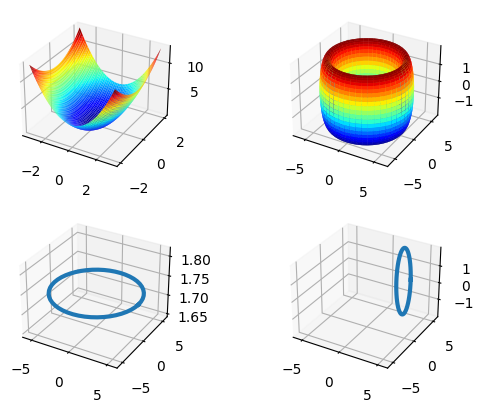

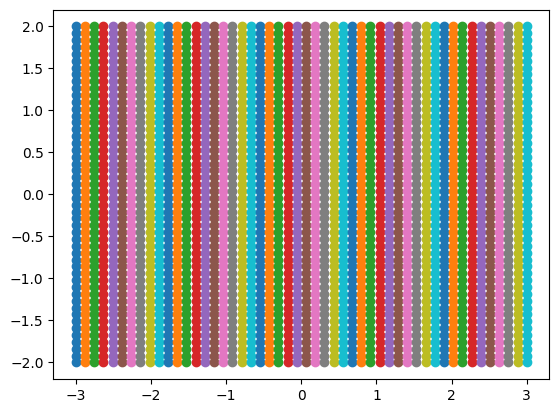

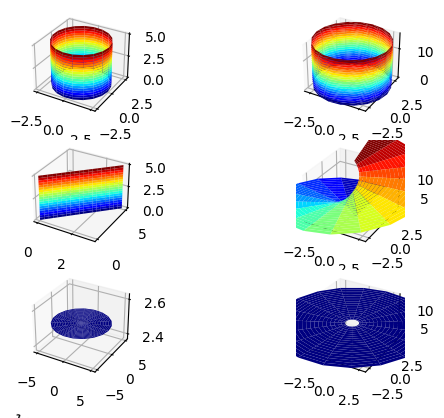

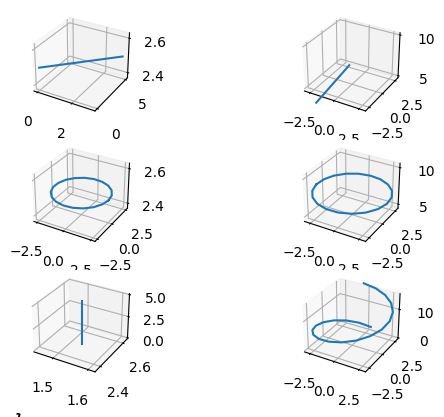

In [ ]:
### tema 1

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#EX 1

fig, ax = plt.subplots(2, 2, subplot_kw = {'projection': '3d'})
x = np.linspace(-3, 3, 50)
y = np.linspace(-2, 2, 50)
x, y = np.meshgrid(x, y)
#print(x)
#print(y)
plt.figure(2)
plt.plot(x, y, 'o')
z = x**2 + y**2
ax[0, 0].plot_surface(x, y, z, cmap = cm.jet)

def Tor(theta, phi):
    x = (5+np.cos(theta))*np.cos(phi)
    y = (5+np.cos(theta))*np.sin(phi)
    z = (2*np.sin(theta))*np.ones_like(y)
    return x, y, z

theta = np.linspace(0, 2*np.pi, 50)
phi = np.linspace(0, 2*np.pi, 50)
theta, phi = np.meshgrid(theta, phi)
x, y, z = Tor(theta, phi)
ax[0, 1].plot_surface(x, y, z, cmap = cm.jet)

#reprezentarea celor doua curbe, phi = constant(=pi/3)
#si respectiv, theta = constant (=pi/3)
phi2 = np.linspace(0, 2*np.pi, 50)
theta2 = np.pi/3
x2, y2, z2 = Tor(theta2, phi2)  #x1, y1, z1 - vectori
ax[1, 0].plot3D(x2, y2, z2, lw = 3)

#ax[1, 0].axis('equal')
ax[1, 0].set_xlim([-6, 6])
ax[1, 0].set_ylim([-6, 6])

phi1 = np.pi/3
theta1 = np.linspace(0, 2*np.pi, 50)
x1, y1, z1 = Tor(theta1, phi1)  #x1, y1, z1 - vectori
ax[1, 1].plot3D(x1, y1, z1, lw = 3)

#ax[1, 1].axis('equal')
ax[1, 1].set_xlim([-6, 6])
ax[1, 1].set_ylim([-6, 6])


#EX 2 - torsiunea cu alungire si deformare radiala

C1 = 2
C2 = 0.4
C3  = 1.3
C4 = 3
a = 5
h= 5
R0 = a/2
Z0 = h/2
Theta0 = np.pi/2

def Fref(Q1, Q2, Q3):
    X1 = Q1*np.cos(Q2)
    X2 = Q1*np.sin(Q2)
    X3 = Q3*np.ones_like(Q2)
    return X1, X2, X3

fig, ax = plt.subplots(3, 2, subplot_kw = {'projection': '3d'})
#reprezentarea suprafetei cilindrice
#Q1 este constant
Q1 = R0
Q2 = np.linspace(0, 2*np.pi, 20)
Q3 = np.linspace(0, h, 20)
Q2, Q3 = np.meshgrid(Q2, Q3)
X1, X2, X3 = Fref(Q1, Q2, Q3)
ax[0, 0].plot_surface(X1, X2, X3, cmap = cm.jet)

#reprezentarea planului longitudinal
#Q2 este constant
Q1 = np.linspace(0, a, 20)
Q2 = Theta0
Q3 = np.linspace(0, h, 20)
Q1, Q3 = np.meshgrid(Q1, Q3)
X1, X2, X3 = Fref(Q1, Q2, Q3)
ax[1, 0].plot_surface(X1, X2, X3, cmap = cm.jet)

#reprezentarea planului transversal
#Q3 este constant
Q1 = np.linspace(0, a, 20)
Q2 = np.linspace(0, 2*np.pi, 20)
Q3 = Z0
Q1, Q2 = np.meshgrid(Q1, Q2)
X1, X2, X3 = Fref(Q1, Q2, Q3)
ax[2, 0].plot_surface(X1, X2, X3, cmap = cm.jet)

#reprezentarea curbelor de coordonate:
fig, ax1 = plt.subplots(3, 2, subplot_kw = {'projection': '3d'})

#reprezentarea generatoarea suprafetei cilindrice
#curba de coor Q1
Q1 = np.linspace(0, a, 20)
Q2 = Theta0
Q3 = Z0
X1, X2, X3 = Fref(Q1, Q2, Q3)
ax1[0, 0].plot3D(X1, X2, X3)

#curba de coor Q2
Q1 = R0
Q2 = np.linspace(0, 2*np.pi, 20)
Q3 = Z0
X1, X2, X3 = Fref(Q1, Q2, Q3)
ax1[1, 0].plot3D(X1, X2, X3)

#curba de coor Q3
Q3 = np.linspace(0, h, 20)
Q1 = R0*np.ones_like(Q3)
Q2 = Theta0*np.ones_like(Q3)
X1, X2, X3 = Fref(Q1, Q2, Q3)
ax1[2, 0].plot3D(X1, X2, X3)

#Ex 3

def Fdef(Q1, Q2, Q3):
    q1 = np.sqrt(C1*(Q1**2)+C2)
    q2 = Q2+C3*Q3
    q3 = C4*Q3
    x1 = q1*np.cos(q2)
    x2 = q1*np.sin(q2)
    x3 = q3*np.ones_like(q2)
    return x1, x2, x3

#reprezentarea suprafetei cilindrice deformate
Q1 = R0
Q2 = np.linspace(0, 2*np.pi, 20)
Q3 = np.linspace(0, h, 20)
Q2, Q3 = np.meshgrid(Q2, Q3)
x1, x2, x3 = Fdef(Q1, Q2, Q3)
ax[0, 1].plot_surface(x1, x2, x3, cmap = cm.jet)
ax[0, 1].axis('equal')
ax[0, 1].set_xlim([-3, 3])
ax[0, 1].set_ylim([-3, 3])

#reprezentarea planului longitudinal deformat
Q1 = np.linspace(0, a, 20)
Q2 = Theta0
Q3 = np.linspace(0, h, 20)
Q1, Q3 = np.meshgrid(Q1, Q3)
x1, x2, x3 = Fdef(Q1, Q2, Q3)
ax[1, 1].plot_surface(x1, x2, x3, cmap = cm.jet)
ax[1, 1].axis('equal')
ax[1, 1].set_xlim([-3, 3])
ax[1, 1].set_ylim([-3, 3])

#reprezentarea planului transversal deformat
Q1 = np.linspace(0, a, 20)
Q2 = np.linspace(0, 2*np.pi, 20)
Q3 = Z0
Q1, Q2 = np.meshgrid(Q1, Q2)
x1, x2, x3 = Fdef(Q1, Q2, Q3)
ax[2, 1].plot_surface(x1, x2, x3, cmap = cm.jet)
ax[2, 1].axis('equal')
ax[2, 1].set_xlim([-3, 3])
ax[2, 1].set_ylim([-3, 3])

#reprezentarea generatoarea suprafetei cilindrice deformate
#curba de coor Q1
Q1 = np.linspace(0, a, 20)
Q2 = Theta0*np.ones_like(Q1)
Q3 = Z0*np.ones_like(Q1)
x1, x2, x3 = Fdef(Q1, Q2, Q3)
ax1[0, 1].plot3D(x1, x2, x3)
ax1[0, 1].axis('equal')
ax1[0, 1].set_xlim([-3, 3])
ax1[0, 1].set_ylim([-3, 3])

#segmentul de dreapta obtinut din intersectia planului transversal si cel longitudinal
#curba de coor Q2 deformata
Q1 = R0
Q2 = np.linspace(0, 2*np.pi, 20)
Q3 = Z0*np.ones_like(Q2)
x1, x2, x3 = Fdef(Q1, Q2, Q3)
ax1[1, 1].plot3D(x1, x2, x3)
ax1[1, 1].axis('equal')
ax1[1, 1].set_xlim([-3, 3])
ax1[1, 1].set_ylim([-3, 3])

#cercul de raza R0
#curba de coor Q3 deformata
Q3 = np.linspace(0, h, 20)
Q1 = R0*np.ones_like(Q3)
Q2 = Theta0*np.ones_like(Q3)
x1, x2, x3 = Fdef(Q1, Q2, Q3)
ax1[2, 1].plot3D(x1, x2, x3)
ax1[2, 1].axis('equal')
ax1[2, 1].set_xlim([-3, 3])
ax1[2, 1].set_ylim([-3, 3])


   
   .

   

In [ ]:
def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'r', label = 'y = f(x)')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'b')
    ax.axhline(y = 0, color = 'k')
    return ax

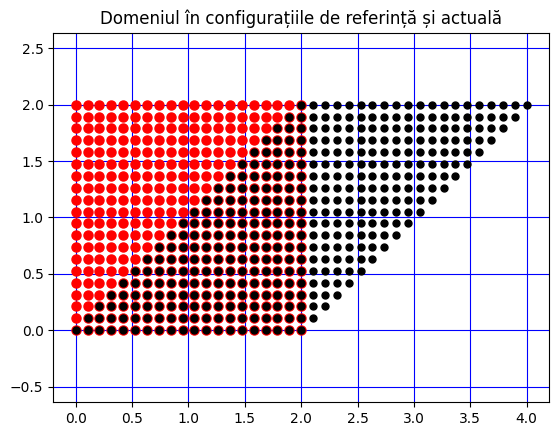

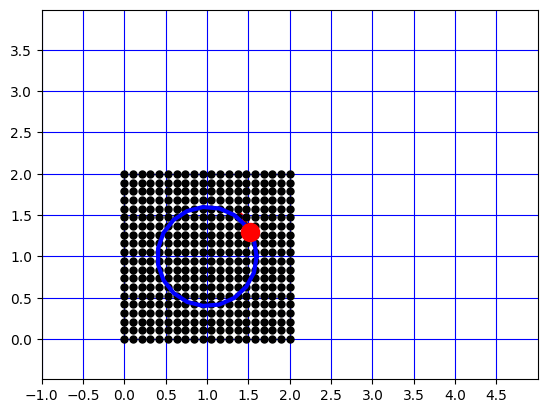

------------------------
Gradientul deformatiei F
------------------------
		 F = 
⎡1  τ  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦
-------------------------
Tensorul Cauchy - Green C
-------------------------
C =  
⎡1    τ     0⎤
⎢            ⎥
⎢    2       ⎥
⎢τ  τ  + 1  0⎥
⎢            ⎥
⎣0    0     1⎦
-----------------------------------------
Valori și vectori proprii ai tensorului C
-----------------------------------------
lam1 = 
1

 v1 = 
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

 lam2 = 
          ________    
 2       ╱  2         
τ    τ⋅╲╱  τ  + 4     
── - ───────────── + 1
2          2          

 v2 = 
⎡         ________⎤
⎢        ╱  2     ⎥
⎢  τ   ╲╱  τ  + 4 ⎥
⎢- ─ - ───────────⎥
⎢  2        2     ⎥
⎢                 ⎥
⎢        1        ⎥
⎢                 ⎥
⎣        0        ⎦

 lam3 = 
          ________    
 2       ╱  2         
τ    τ⋅╲╱  τ  + 4     
── + ───────────── + 1
2          2          

 v3 = 
⎡         ________⎤
⎢        ╱  2     ⎥
⎢  τ   ╲╱  τ  + 4 ⎥
⎢- ─ + ───────────⎥
⎢  

"\n# Normăm vectorii folosind metoda norm() specifică marimilor de tip Matrix\nn1 = ...\nn2 = ...\nn3 = ...\n\n#5.\n# Calculăm valorile proprii pentru tau = 1 folosind metoda subs\n\ntau1 = 1\n\nF1 = ...\nC1 = ....\n\n# Se calculeaza vectorii proprii ortonormati în tau =1 și se evalueaza numeric cu 3 cifre dupa virgulă\nn_1 = ...\nn_2 = ...\nn_3 = ...\n\nafisare_mesaj('Directiile principale')\nprint('n1(tau = 1) = ')\nsm.pprint(n_1)\n\nprint('n2(tau = 1) = ')\nsm.pprint(n_2)\n\nprint('n3(tau = 1) = ')\nsm.pprint(n_3)\n\n# În mod analog se procedează și cu valorile proprii\nlam_1 = ...\nlam_2 = ...\nlam_3 = ....\n\nafisare_mesaj('Valorile proprii')\nprint('lam1(tau = 1) = ')\nsm.pprint(lam_1)\n\nprint('lam2(tau = 1) = ')\nsm.pprint(lam_2)\n\nprint('lam3(tau = 1) = ')\nsm.pprint(lam_3)\n\n\n#Calculam radacina patrata U1 a tensorului C1 pentru tau = 1. Vom folosi functia diag pusă la dispoziție\n# de Sympy și care are ca parametri elementele de pe diagonală.\n#Obs. Matricea U1 reprezinta 

In [ ]:
from sympy.polys.fields import xfield
#lab 3

import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

#Exercitiu: Fie dată mișcarea reprezentată în raport cu coordonatele carteziene:
#x_1 = X_1 + \tau(t) X_2
# x_2 =  X_2
# x_3 =  X_3
# unde tau:[0,\infty)--> R+ este o functie data, tau(0) = 0.
#1. Sa se construiasca grafic domeniul (X_1, X_2)\in[0,2]X[0,2] in configuratia initiala si cea
# curenta la momentul de timp t =  1, daca tau(t) = t^2.


# Discretizarea fiecărui interval în parte
X1 = np.linspace(0, 2, 20)
X2 = np.linspace(0, 2, 20)

#Construirea rețelei de noduri care acoperă domeniul bidimensional (X1,X2) in [0,2]X[0,2]
X1, X2 = np.meshgrid(X1, X2)

# Crearea zonei grafice
fig = plt.figure(1)

# Construirea unui sistem de axe de coordonate
ax = plt.axes()

# Reprezentarea grafică a rețelei de puncte
ax.plot(X1, X2, linestyle = 'None', marker = '.', markersize = 13, markerfacecolor = 'r', markeredgecolor = 'r')
ax.axis('equal')

# Construim deformata pentru tau = 1.
tau = 1
x1 = X1 + tau*X2
x2 = X2

# Reprezentarea grafică a deformatei domeniului
ax.plot(x1, x2, linestyle = 'None', marker = '.', markersize = 10, markerfacecolor = 'k', markeredgecolor = 'k')
ax.grid(True,color = 'b')
ax.axis('equal')
plt.title('Domeniul în configurațiile de referință și actuală')


#2. Sa se simuleze animatia miscarii domeniului pe intervalul t\in[0,1] considerandu-se o
# discretizare a intervalului cu 10 elemente.
#3. Fie curba X1 = 1 + 0.6 cos(lambda), X2 = 1 + 0.6 sin(lambda), lambda \in [0,2, pi] in configuratia
# initiala. In procesul de miscare a domeniului sa se reprezinte  si aceasta curba la fiecare
# moment de timp.
#4. Sa se reprezinte grafic la fiecare moment de timp vectorul tangent la curba data
# in punctul (X1,X2) corespunzator parametrului lambda = \pi/6.

#Discretizarea fiecărui interval în parte
X1 = np.linspace(0, 2, 20)
X2 = np.linspace(0, 2, 20)

#Construirea rețelei de noduri care acoperă domeniul bidimensional (X1,X2) in [0,2]X[0,2]
X1, X2 = np.meshgrid(X1, X2)

# Discretizarea intervalului pentru parametrul lambda
lam = np.linspace(0, 2*np.pi, 20)

# Ecuațiile parametrice ale cercului
X1C = 1 + 0.6*np.cos(lam)
X2C = 1 + 0.6*np.sin(lam)

# Calculul vectorului tangent la curbă în punctul (X1,X2) corespunzător lui lambda = pi/6
lam0 = np.pi / 6
P = np.array([-0.6*np.sin(lam0), 0.6*np.cos(lam0)])

# Punctul (X1(pi/6),X2(pi/6)) situat pe cerc
X10 = 1 + 0.6*np.cos(lam0)
X20 = 1 + 0.6*np.sin(lam0)

# Discretizarea timpului
t = np.linspace(0, 1, 20)

# Calculul lui tau
tau = t**2

# Definirea zonei grafice și a sistemului de coordonate în baza metodei subplots
fig, ax = plt.subplots()

for i in range(len(tau)):
    # Rețeaua de puncte din configurația actualizată la momentul de timp t_i
    x1 = X1 + tau[i]*X2
    x2 = X2
    # Cercul actualizat
    x1C = X1C + tau[i]*X2C
    x2C = X2C
    # Punctul din configurația actuală în care se va construi vectorul tangent
    x10 = X10 + tau[i]*X20
    x20 = X20
    # Gradientul deformației evaluat numeric la fiecare moment de timp t_i
    F = np.array([[1, tau[i], 0], [0, 1, 0], [0, 0, 1]])
    # Actualizarea vectorului tangent.
    # Obs.: Intrucât vectorul P din configurația inițială este ales în plan, iîn urma mișcării acesta
    # rămâne în plan.
    p = F[0:2, 0:2] @ P


    # Nu vrem să păstrăm imaginile vechi, ci vrem ca la fiecare moment de timp să construim
    # o nouă imagine. Funcția clear() golește conținutul obiectului ax fără să-l șteargă.
    ax.clear()

    # Selectează aceeași unitate de scară pe cele două axe de coordonate.
    ax.axis('equal')

    # Afișează grila
    ax.grid(True, color='b')

    # Reprezentarea grafică a domeniului deformat
    ax.plot(x1, x2, linestyle='None', marker='.', markersize=10, markerfacecolor='k', markeredgecolor='k')

    # Reprezentarea grafică a cercului deformat
    ax.plot(x1C, x2C, linestyle='-',color = 'b', lw=3)
    ax.plot(x10, x20, linestyle='None', marker='o', markersize=13, markerfacecolor='r', markeredgecolor='r')
    # Reprezentarea grafică a vectorului tangent la cercul deformat.
    # Funcția quiver() necesită drept parametri coordonatele originii și componentele vectorului.
    ax.quiver(x10, x20, p[0], p[1], color='r')

    # Setarea limitelor pentru axe
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 3)

    # Setarea grilei pentru x și y cu distanța dintre marcaje de 0.5
    ax.set_xticks(np.arange(-1, 5, 0.5))
    ax.set_yticks(np.arange(-1, 5, 0.5))

    # Setarea unei pauze între două imagini succesive. Cu cât este mai mare parametrul
    # funcției pause() cu atât viteza de succedare a cadrelor este mai mică. Alegând parametrul
    # mai mic crește viteza cu care se afișează imaginile una după alta.
    plt.pause(0.005)
plt.show()

#%%
#5. Sa se calculeze simbolic gradientul deformatiei F(X,tau) si tensorul Cauchy-Greean la dreapta
# C(X,tau). Sa se afle simbolic valorile si vectorii proprii ai tensorului C, punandu-se in evidenta
# baza ortonormata formata din vectori proprii.
# Obs.: Valorile si vectorii proprii vor depinde de parametrul tau.
#
# Pentru calcul simbolic vom încărca modului sympy

import sympy as sm

#Afisarea unui mesaj delimitat de linii
def afisare_mesaj(mesaj):
    chenar = '-'
    linie = len(mesaj) * chenar
    print(linie)
    print(mesaj)
    print(linie)


# Declararea simultană a variabilelor simbolice de tip real.
X1, X2, X3, tau = sm.symbols("X1, X2, X3, tau", real = True)

# Calculul expresiilor simbolice care determină mișcarea
x1 = X1 + tau *X2
x2 = X2
x3 = X3

# Scrierea acestora sub forma de obiecte de tip Matrix
X = sm.Matrix([X1, X2, X3])
x = sm.Matrix([x1, x2, x3])
# Inițializarea gradientului de deformație
F = sm.zeros(3, 3)
# Calculul componentelor gradientului de deformație. Funcția diff cu care este echipat modulul sympy
# calculează simbolic derivate parțiale. Are ca drept parametri, expresia simbolică pe care dorim să
# o derivăm și variabila simbolică în raport cu care se face derivarea.

for i in range(3):
    for j in range(3):
        F[i, j] = sm.diff(x[i], X[j])

afisare_mesaj('Gradientul deformatiei F')
print('\t\t F = ')
sm.pprint(F)

# Aflam valorile si vectorii proprii ai matricei C
C = F.T * F

afisare_mesaj('Tensorul Cauchy - Green C')
print('C =  ')
sm.pprint(C)

# Calculul valorilor proprii și a vectorilor proprii corespunzători acestora (metoda eigenvects)
vecprop = C.eigenvects()

#Obs.: Funcția eigenvects() returnează o lista formată din tot atâtea elemente câte valori
# proprii distincte admite matricea. Fiecare element al listei reprezintă un tuplu de forma
# (lam, m_lam, [v1,v2,...,vm_lam]). Primul element este valoarea proprie, al doilea element
# este ordinul de multiplicitate, iar pe ultima poziție avem din nou o listă cu un număr de vectori de tip Matrix egal
# cu ordinul de multiplicitate. Astfel, pentru accesarea lor vom proceda după cum urmează


lam1 = vecprop[0][0] #Primul indice accesează primul element din lista vecprop, al doilea
# indice accesează primul element din tuplul (lam1, m_lam1, [v1,v2,...,vm_lam]), adică valoarea proprie.

lam2 = vecprop[1][0] #Primul indice accesează al doilea element din lista vecprop, al doilea
# indice accesează primul element din tuplul (lam2, m_lam2, [v1,v2,...,vm_lam])
lam3 = vecprop[2][0] #Primul indice accesează al treile element din lista vecprop, al doilea
# indice accesează primul element din tuplul (lam3, m_lam3, [v1,v2,...,vm_lam])

v1 = vecprop[0][2][0] # Al doilea indice se referă la al treilea element din tuplu care este o listă de vectori proprii
# Pot mai mulți decât unu, dacă ordinul de multiplicitate este mai mare decât unu.
# În cazul nostru, avem 3 valori proprii distincte cu ordine de multiplicitate egale cu 1, astfel că vom accesa pentru
# pentru fiecare valoare proprie singurul vector propriu.
v2 = vecprop[1][2][0]
v3 = vecprop[2][2][0]

# Aducem expresiile calculate la o formă simplificată folosind funcția din sympy simplify()

v1 = sm.simplify(v1)
v2 = sm.simplify(v2)
v3 = sm.simplify(v3)

# Afișarea valorilor și a vectorilor proprii sub o formă căt mai aproape de scrierea matematică.
# Vom folosi functia din sympy pprint(), care un singur parametru expresia simbolică pe care o dorim să
# o afișăm.

afisare_mesaj('Valori și vectori proprii ai tensorului C')
print('lam1 = ')
sm.pprint(lam1)
print('\n v1 = ')
sm.pprint(v1)

print('\n lam2 = ')
sm.pprint(lam2)
print('\n v2 = ')
sm.pprint(v2)

print('\n lam3 = ')
sm.pprint(lam3)
print('\n v3 = ')
sm.pprint(v3)
'''
# Normăm vectorii folosind metoda norm() specifică marimilor de tip Matrix
n1 = ...
n2 = ...
n3 = ...

#5.
# Calculăm valorile proprii pentru tau = 1 folosind metoda subs

tau1 = 1

F1 = ...
C1 = ....

# Se calculeaza vectorii proprii ortonormati în tau =1 și se evalueaza numeric cu 3 cifre dupa virgulă
n_1 = ...
n_2 = ...
n_3 = ...

afisare_mesaj('Directiile principale')
print('n1(tau = 1) = ')
sm.pprint(n_1)

print('n2(tau = 1) = ')
sm.pprint(n_2)

print('n3(tau = 1) = ')
sm.pprint(n_3)

# În mod analog se procedează și cu valorile proprii
lam_1 = ...
lam_2 = ...
lam_3 = ....

afisare_mesaj('Valorile proprii')
print('lam1(tau = 1) = ')
sm.pprint(lam_1)

print('lam2(tau = 1) = ')
sm.pprint(lam_2)

print('lam3(tau = 1) = ')
sm.pprint(lam_3)


#Calculam radacina patrata U1 a tensorului C1 pentru tau = 1. Vom folosi functia diag pusă la dispoziție
# de Sympy și care are ca parametri elementele de pe diagonală.
#Obs. Matricea U1 reprezinta matricea asociata tensorului U în tau = 1 relativ la baza n_i, i=1,2,3
U1 = ...

afisare_mesaj('Matricea tensorul alungirilor U pentru tau = 1 în raport cu baza ortonormată')
print('U(tau = 1) = ')
sm.pprint(U1)

#Calculam inversa matricei U1 relativ la baza ortonormata
U1inv = ...

afisare_mesaj('Matricea tensorul alungirilor U^-1 pentru tau = 1 în raport cu baza ortonormată')
print('U^-1(tau = 1) = ')
sm.pprint(U1inv)



#Calculam U1^-1 în raport cu baza carteziană

#Definim matricea de trecere Q de la baza I_i la baza n_i, Qij = I_i . n_j

I1 = ...
I2 = ...
I3 = ...

# Produsele scalare dintre vectorii din baza carteziană și vectorii din baza ortonormată formată din vectori proprii
# se vor calcula folosind funcția dot specifică marimilor de tip Matrix.
# Calculam produse scalare intre Ii si n_j
Q = ...

afisare_mesaj('Matricea Q')
print('Q(tau = 1) = ')
sm.pprint(Q)


# Calculam pe U ^ -1 raportat la baza carteziana
U1inv = ...

afisare_mesaj('Matricea inversului tensorului alungirilor, U^-1(tau = 1) în raport cu baza carteziană')
print('U^{-1}(tau = 1) = ')
print(U1inv)

# Calculam R din F = RU

R1 = ...
afisare_mesaj('Matricea tensorul rotațiilor R(tau = 1) în raport cu baza carteziană')
print('R(tau = 1) = ')
sm.pprint(R1)



'''